In [1]:
import h5py
import psana
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import  rotate
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit,minimize
import multiprocessing
import os
from functools import partial
import time
import sys
import argparse
from datetime import datetime
import tempfile
import XSpect.XSpect_Analysis
import XSpect.XSpect_Controller
import XSpect.XSpect_Visualization


## Viewing Static XES Spectra

Processing: 100%|██████████| 18/18 [00:06<00:00,  2.76Shot_Batch/s]


Text(0.5, 1.0, 'mfxl1038723 Run [28]')

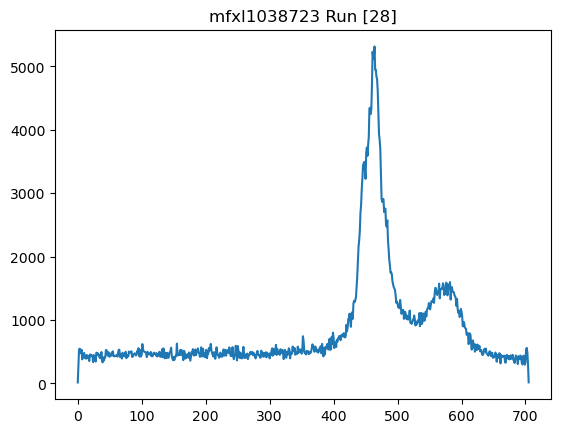

In [2]:
xes_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(hutch='mfx',experiment_id='mfxl1038723',lcls_run=23)
xes=XSpect.XSpect_Controller.XESBatchAnalysisRotation()
xes.key_epix=['epix_1/ROI_0_area']
#xes.set_key_aliases(keys,names)
#xes.import_roi=[[523,535]]

xes.adu_cutoff=3.0
xes.angle=-1.2
xes.transpose=True

#Accepts string that describes runs to process e.g. 28, 27-28, or 27-28 29 31
xes.run_parser(['28'])
#change ROIs to analyze here. The roi indices are after the reindexing from the smalldata production. Eg. pixel 80 here is 280 on the detector irl.
#the roi is applied after the detector rotation so account for the slight change in indices after rotation.
#xes.rois=[[80,100]]

start=time.time()
xes.primary_analysis_parallel_range(4,xes_experiment,method=xes.primary_analysis_static,increment=2000,verbose=False)
end=time.time()
v=XSpect.XSpect_Visualization.XESVisualization()
v.combine_static_spectra(xes_analysis=xes,xes_key='epix_ROI_1')
plt.plot(v.summed_xes)
plt.title(f'mfxl1038723 Run {xes.runs}')
#plt.xlim(100,300)
#plt.ylim(0,5000)

## View summed detector image

Text(0.5, 1.0, 'Run [28]')

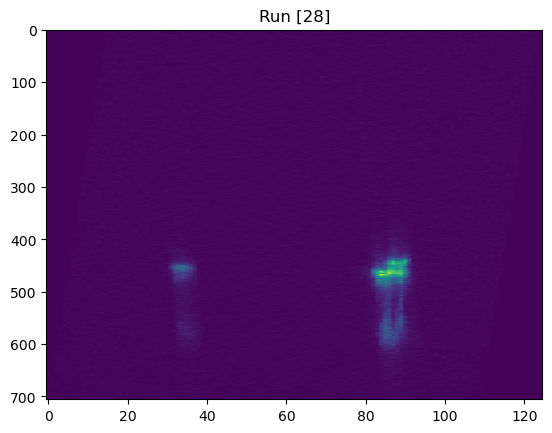

In [3]:
v.combine_static_spectra(xes_analysis=xes,xes_key='epix')
from scipy.ndimage import rotate
plt.figure(dpi=100)
plt.imshow(rotate(v.summed_xes,0),aspect='auto')
plt.title
plt.title(f'Run {xes.runs}')

## View spatial projection

Text(0.5, 1.0, 'Spatial Projection run: [28]')

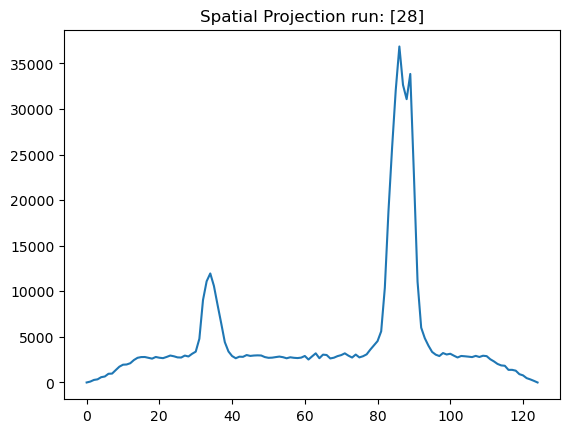

In [4]:
v.combine_static_spectra(xes_analysis=xes,xes_key='epix')
from scipy.ndimage import rotate
plt.figure(dpi=100)
plt.plot(np.nansum(v.summed_xes,axis=0))
#plt.axvline(523,linestyle='--')
#plt.axvline(523+12,linestyle='--')
#plt.xlim(20,40)
#plt.ylim(350,600)
plt.title(f'Spatial Projection run: {xes.runs}')

## View Energy Projection

Text(0.5, 1.0, 'run: [28]')

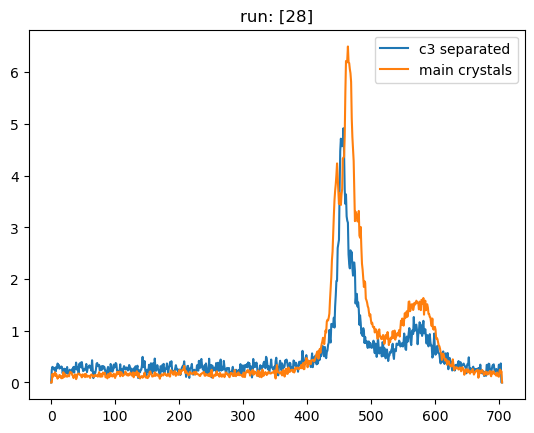

In [5]:
plt.plot(np.nansum(v.summed_xes[:,25:41]/np.max(v.summed_xes[:,25:41]),axis=1))
plt.plot(np.nansum(v.summed_xes[:,78:98]/np.max(v.summed_xes[:,78:98]),axis=1))
plt.legend(['c3 separated','main crystals'])
plt.title(f'run: {xes.runs}')